# **Shark Attacks | Project 1**

### **Libraries & Load Data**

In [14]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [16]:
# Display options: show all columns
pd.set_option('display.max_columns', None)

In [17]:
# Load Data
data_path = Path('../data/raw/GSAF5.csv')
df = pd.read_csv(data_path)
print('Df Shape: ', df.shape)
df.head(10)

Df Shape:  (7058, 21)


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal Y/N,Time,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order
0,27th November,2025.0,Unprovoked,Australia,NSW,Crowdy Bay,Swimming,Lukas Schindler,M,26,Serious leg injuries,N,0630hrs,3m Bull shark,Media: Todd Smith: Andy Currie: Simon De March...,NaN,NaN,NaN,NaN,NaN,NaN
1,27th November,2025.0,Unprovoked,Australia,NSW,Crowdy Bay,Swimming,Livia Mulheim,F,25,Not stated,Y,0630hrs,3m Bull shark,Media: Todd Smith: Andy Currie: Simon De March...,NaN,NaN,NaN,NaN,NaN,NaN
2,10th November,2025.0,Unprovoked,Australia,Western Australia,Prevelly Beach Magaret River,Foil Boarding,Andy McDonald,M,61,No Injury to self,N,1745hrs,Great White Shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN
3,9th November,2025.0,Unprovoked,French Polynesia,Marquesas Islands,Hakahau Bay,Swimming,Not stated (Dentist),M,40,Deep Gash to bicep,N,Not stated,3m shark,Andrew Currie,NaN,NaN,NaN,NaN,NaN,NaN
4,5th November,2025.0,Unprovoked,USA,Hawaii,Pine Trees Hanalei Bay Kaui,Swimming,Chance Swanson,M,?,Injuries to legs,N,Mid afternoon,Unknown,James Kingsley: Andy Currie: Beat of Hawaii:,NaN,NaN,NaN,NaN,NaN,NaN
5,5th November,2025.0,Unprovoked,USA,Texas,Matagorda Beach Matagorda,Fishing,Chuck Bledsoe,M,?,Laceration on top and undermeath right foot,N,Not stated,Not stgated,Christofer Eskander: The Bay City Tribune:,NaN,NaN,NaN,NaN,NaN,NaN
6,4th November,2025.0,Unprovoked,Samoa,NaN,Aga Reef Resort Lalomanu,Surfing,Evan Campbell,M,13,Lacerations to right leg,N,1800hrs,Suspected Tiger shark,Andy Currie: STAB Magazine: Facebook Samoa Obs...,NaN,NaN,NaN,NaN,NaN,NaN
7,14th October,2025.0,Unprovoked,Columbia,"Bolivar, del Isolate",Catagena Province,Swimming with sharks,Male child,M,14,Severe hand injury,N,Not stated,Nurse shark,Kevin McMurray Trackingsharks.com Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN
8,11th October,2025.0,Unprovoked,Australia,Queensland,Cook Esplanade Thursday Island,Fishing/swimming,Samuel Nai,M,14,Serious abdonminal injuries,N,1823 hrs,Tiger or Bull shark,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN
9,7th October,2025.0,Unprovoked,Australia,South Australia,Kangaroo Island,Surfing,Lee Berryman,M,50+,Lacerations to calf,N,1330hrs,Bronze whaler?,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN


### **EDA**

In [18]:
#  Schema
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7058 entries, 0 to 7057
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            7058 non-null   object 
 1   Year            7056 non-null   float64
 2   Type            7040 non-null   object 
 3   Country         7008 non-null   object 
 4   State           6571 non-null   object 
 5   Location        6491 non-null   object 
 6   Activity        6473 non-null   object 
 7   Name            6839 non-null   object 
 8   Sex             6479 non-null   object 
 9   Age             4064 non-null   object 
 10  Injury          7023 non-null   object 
 11  Fatal Y/N       6497 non-null   object 
 12  Time            3532 non-null   object 
 13  Species         3927 non-null   object 
 14  Source          7038 non-null   object 
 15  pdf             6799 non-null   object 
 16  href formula    6794 non-null   object 
 17  href            6796 non-null   o

In [13]:
# Ordered Nulls
nulls = df.isnull().sum().sort_values(ascending=False)
print('Nulls in each column:\n',nulls)

Nulls in each column:
 Time              3526
Species           3131
Age               2994
Activity           585
Sex                579
Location           567
Fatal Y/N          561
State              487
href formula       264
href               262
Case Number.1      261
Case Number        260
pdf                259
original order     259
Name               219
Country             50
Injury              35
Source              20
Type                18
Year                 2
Date                 0
dtype: int64


In [20]:
# Distinct Values per Column
distinct_counts = df.nunique().sort_values(ascending=False)
print('Distinct Values per Column: \n',distinct_counts)

Distinct Values per Column: 
 original order    6797
pdf               6789
href formula      6784
Case Number       6777
href              6776
Case Number.1     6775
Date              6005
Name              5781
Source            5393
Location          4605
Injury            4173
Species           1733
Activity          1608
State              940
Time               466
Year               261
Country            250
Age                171
Type                13
Fatal Y/N           12
Sex                 10
dtype: int64


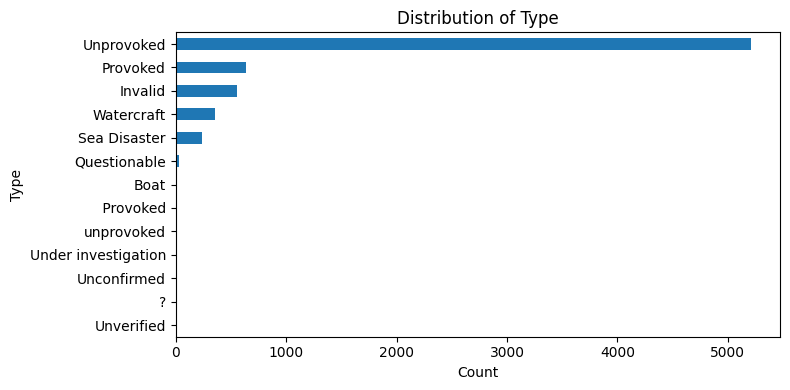

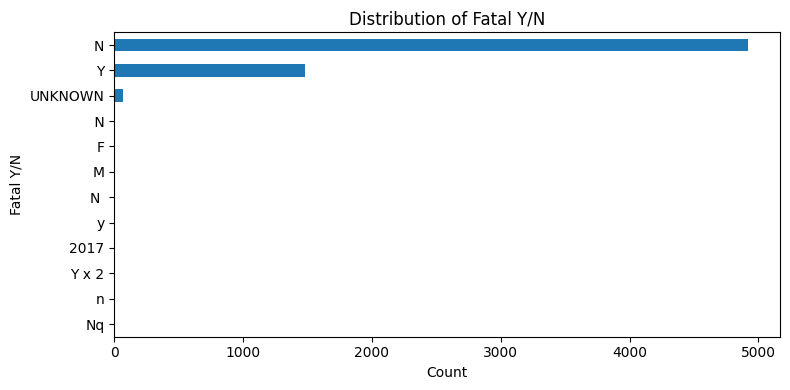

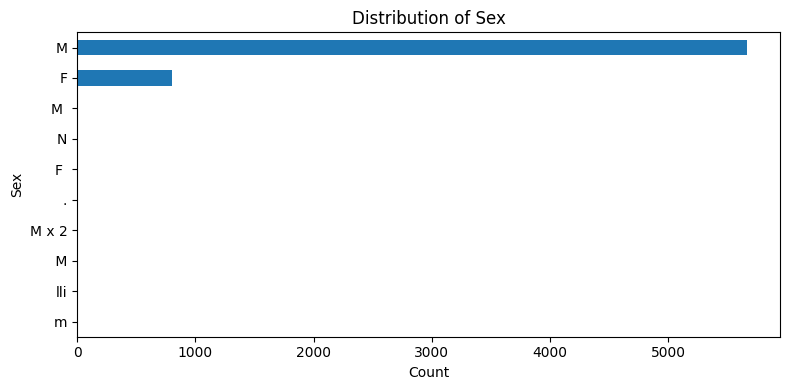

In [28]:
# Histograms of low cardinality columns (Type, Fatal Y/N, Sex)
low_cardinality_cols = ['Type','Fatal Y/N', 'Sex']

for col in low_cardinality_cols:
    plt.figure(figsize=(8,4))
    df[col].value_counts().sort_values(ascending=True).plot(kind='barh')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

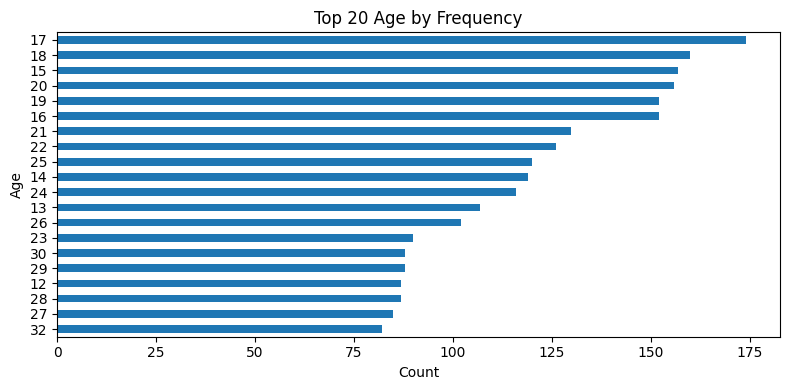

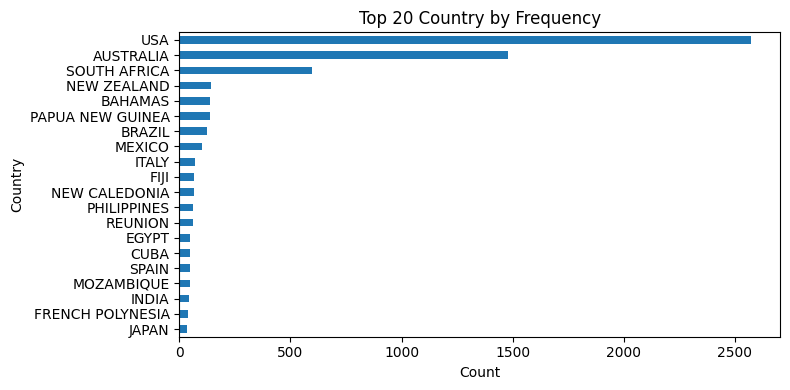

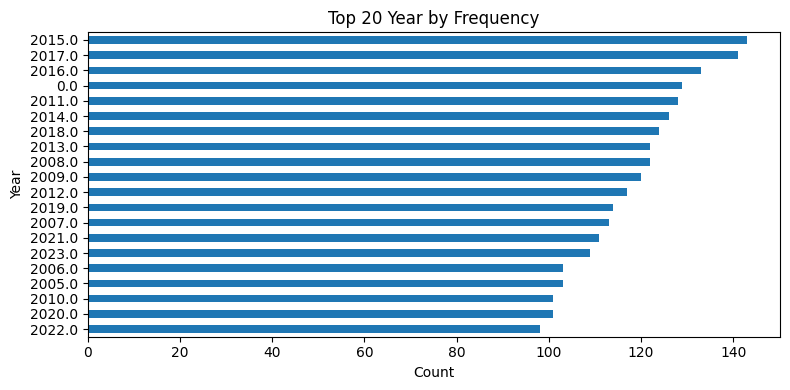

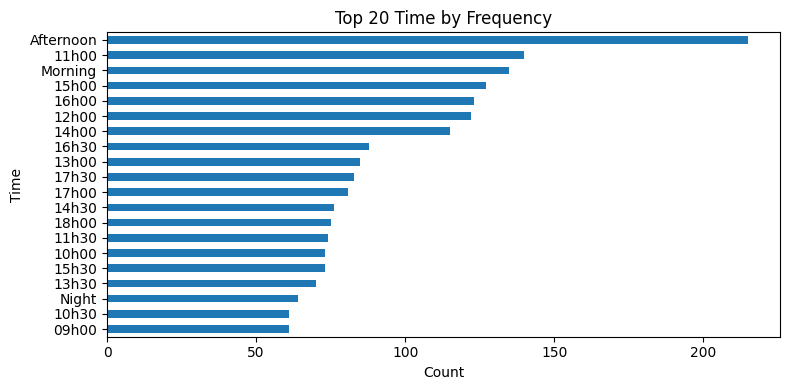

In [31]:
# Histogram of medium cardinality columns (Age, Country, Year, Time)
med_cardinality_cols = ['Age','Country','Year','Time']

for col in med_cardinality_cols:
    plt.figure(figsize=(8,4))
    df[col].value_counts().nlargest(20).sort_values(ascending=True).plot(kind='barh')
    plt.title(f'Top 20 {col} by Frequency')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

### **EDA | Specific Variables Exploration**

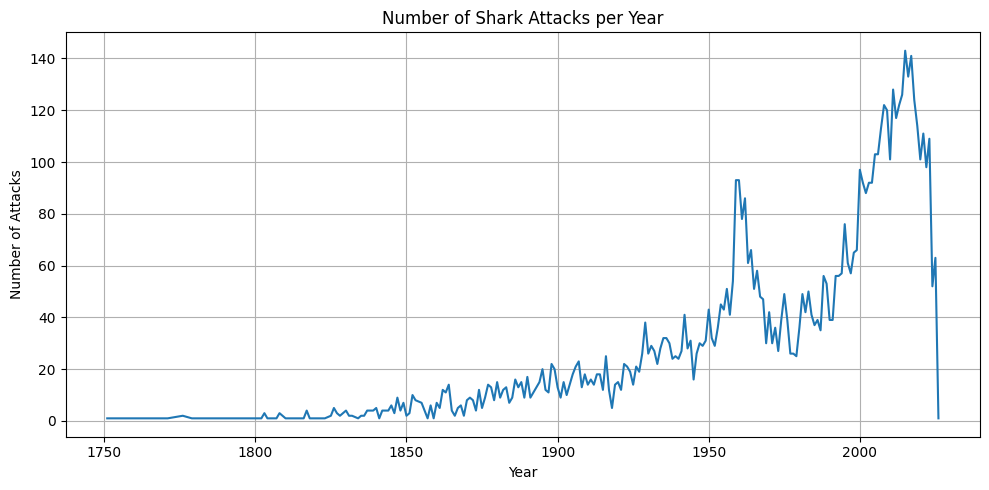

In [35]:
# Year line chart
plt.figure(figsize=(10,5))
df[df['Year']>= 1750]['Year'].value_counts().sort_index().plot(kind='line')
plt.title('Number of Shark Attacks per Year')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.grid()
plt.tight_layout()
plt.show()

In [37]:
# Age Histogram

plt.figure(figsize=(10,5))
df['Age'].dropna().astype(float).plot(kind='hist', bins=30, edgecolor='black')
plt.title('Distribution of Age of Victims')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid()
plt.tight_layout()
plt.show()


ValueError: could not convert string to float: '?'

<Figure size 1000x500 with 0 Axes>

**Transformations to do:**

- **Date:** convert format to real date '27th November' to '11/27/2025'. Use the Column [Year] to concatenate the year into the normalized Date

- **Year:** Convert to Integer, from '2025.0' to '2025'

- **Type:** Normalize different iterations of the same value, example: 'Unprovoked' & 'unprovoked'

- **Country:** Only 50 nulls, explore those records to see if there is opportunity to extrapolate it from other columns like 'Location' or 'State'

- **State:** N/A

- **Location:** N/A

- **Activity:** Normalize different iterations of the same value

- **Name:** N/A

- **Sex:** Normalize different iterations of the same value

- **Age:** Remove non numerical values, explore those records

- **Injury:** Normalize different iterations of the same value and Explore creating categories (clusters?)

- **Fatal Y/N:** Normalize different iterations of the same value, this must be a binary column, maybe create a different column for values that are not Y/N or delete those records

- **Time:** Normalize to timestamp, create a new column called 'time_cluster' with 'Afternoon/Morning/Night'

- **Species:** Normalize different iterations of the same value, Create a new column with the size when available called 'shark_size' that contains meters, ie. '3m'.

- **Source:** N/A

- **These columns will be excluded from the dataset:** (pdf,href formula, href, Case Number, CaseNumber.1, original order)

